In [1]:
setwd("/Users/rebecca/sudmant/analyses/myotis/analysis/reciprocal_best_hits/01_get_best_hits")

library(pafr)
library(ggplot2)
library(dplyr, quietly = TRUE)
library(data.table)
library(GenomicRanges)

chromsize <- fread("/Users/rebecca/sudmant/analyses/myotis/data/mMyoAui_chromsizes", data.table = FALSE)
colnames(chromsize) <- c("Chr", "Chr_Length")

Loading required package: ggplot2


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, r

In [2]:
# hits_rev <- read_paf("resources/pafs/trimmed/mMyoAui1.cleaned.hapheader_mMyoCai1.cleaned.hapheader.exact_trimmed.paf", include_tags = FALSE)
# hits_rev[grep("SUPER__10$", hits_rev$tname),] %>% arrange(tstart) %>% head()

In [3]:
hits <- read_paf("resources/pafs/trimmed/mMyoCai1.cleaned.hapheader_mMyoAui1.cleaned.hapheader.exact_trimmed.paf", include_tags = FALSE)
hits[grep("SUPER__10$", hits$qname),] %>% arrange(qstart) %>% head()

,qname,qlen,qstart,qend,strand,tname,tlen,tstart,tend,nmatch,alen,mapq
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,mMyoAui1.0.SUPER__10,85605049,20008,3265126,+,mMyoCai1.0.SUPER__10,86584055,10992,3175158,2808052,3601232,6
2,mMyoAui1.0.SUPER__10,85605049,3265126,3359232,-,mMyoCai1.0.SUPER__10,86584055,3234647,3300743,54608,105594,3
3,mMyoAui1.0.SUPER__10,85605049,3370017,3464480,-,mMyoCai1.0.SUPER__10,86584055,3146907,3260799,77646,130709,4
4,mMyoAui1.0.SUPER__10,85605049,3465822,4075390,+,mMyoCai1.0.SUPER__10,86584055,3302935,3938473,551374,693732,5
5,mMyoAui1.0.SUPER__10,85605049,4075390,29726712,+,mMyoCai1.0.SUPER__10,86584055,4005987,29780137,23957778,27467694,8
6,mMyoAui1.0.SUPER__10,85605049,29765477,30164150,+,mMyoCai1.0.SUPER__10,86584055,29741303,30161710,359928,459152,6


In [4]:
hits <- hits %>% arrange(desc(nmatch))
hits$seqnames <- hits$qname
hits$start <- hits$qstart
hits$end <- hits$qend
hits_ranges <- GenomicRanges::makeGRangesFromDataFrame(hits, ignore.strand = T)
hits_ranges <- hits_ranges[unique(findOverlaps(hits_ranges, type = "any", select = "first")),]
hits <- as.data.frame(hits_ranges)
hits$seqnames <- as.character(hits$seqnames)

In [5]:
hits[grep("SUPER__10$", hits$seqnames),]

,seqnames,start,end,width,strand
,<chr>,<int>,<int>,<int>,<fct>
21,mMyoAui1.0.SUPER__10,40614976,67543232,26928257,*
22,mMyoAui1.0.SUPER__10,4075390,29726712,25651323,*
43,mMyoAui1.0.SUPER__10,68275000,83804472,15529473,*
62,mMyoAui1.0.SUPER__10,30165256,39294600,9129345,*
113,mMyoAui1.0.SUPER__10,20008,3265126,3245119,*
172,mMyoAui1.0.SUPER__10,39620000,40499616,879617,*
206,mMyoAui1.0.SUPER__10,29765477,30164150,398674,*
234,mMyoAui1.0.SUPER__10,67586041,67809192,223152,*
275,mMyoAui1.0.SUPER__10,39340000,39464998,124999,*


In [6]:
hit_length <- hits %>%
  dplyr::mutate(
    Chr = sapply(strsplit(as.character(hits$seqnames), ".", fixed = T), function(x) x[length(x)]),
    Length = end - start
  ) %>%
  dplyr::group_by(Chr) %>%
  dplyr::summarise(Recip_Length = sum(Length))
hit_length <- merge(chromsize, hit_length, by = 1, all = TRUE)
hit_length$Recip_Length[is.na(hit_length$Recip_Length)] <- 0
hit_length$Frac = with(hit_length, Recip_Length / Chr_Length)
hit_length$Frac_Prefilter <- hit_length$Frac
hit_prefilter <- hit_length
hit_prefilter_paf <- hits

In [8]:
hits[grep("SUPER__10$", hits$seqnames),] %>% arrange(start) %>% head()

,seqnames,start,end,width,strand
,<chr>,<int>,<int>,<int>,<fct>
1,mMyoAui1.0.SUPER__10,20008,3265126,3245119,*
2,mMyoAui1.0.SUPER__10,3370017,3464480,94464,*
3,mMyoAui1.0.SUPER__10,4075390,29726712,25651323,*
4,mMyoAui1.0.SUPER__10,29765477,30164150,398674,*
5,mMyoAui1.0.SUPER__10,30165256,39294600,9129345,*
6,mMyoAui1.0.SUPER__10,39311291,39334985,23695,*


In [7]:
head(hit_prefilter %>% arrange(desc(Frac)))

,Chr,Chr_Length,Recip_Length,Frac,Frac_Prefilter
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,SUPER__112,22900,22900,1,1
2,SUPER__120,22269,22269,1,1
3,SUPER__124,21496,21496,1,1
4,SUPER__141,12297,12297,1,1
5,SUPER__69,46718,46718,1,1
6,SUPER__76,32488,32488,1,1


In [10]:
hits <- fread("test.csv", data.table = FALSE)

In [472]:
head(hits)
dim(hits)

,Spec1_Subj_ID,Spec1_Query_ID,Spec1_Chr,Spec1_Start,Spec1_End,Spec2_Subj_ID,Paf2_Mapq,Spec2_Query_ID,Paf1_Mapq
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,mMyoAui1.0.SUPER__1 132071739 133691155 66,mMyoAui1.0.SUPER__1 132064304 133790000 78,SUPER__1,132071739,133691155,mMyoCai1.0.SUPER__1 101097090 102889262 78,7,mMyoCai1.0.SUPER__1 101212272 102868848 66,8
2,mMyoAui1.0.SUPER__1 129590316 129701614 20,mMyoAui1.0.SUPER__1 129570000 129660000 41,SUPER__1,129590316,129660000,mMyoCai1.0.SUPER__1 104717580 104818745 41,5,mMyoCai1.0.SUPER__1 104675000 104805000 20,5
3,mMyoAui1.0.SUPER__1 107953644 108596369 51,mMyoAui1.0.SUPER__1 107953464 108594616 47,SUPER__1,107953644,108594616,mMyoCai1.0.SUPER__1 125701245 126298588 47,5,mMyoCai1.0.SUPER__1 125693152 126298464 51,5
4,mMyoAui1.0.SUPER__1 107775998 107878130 17,mMyoAui1.0.SUPER__1 107775936 107878208 5,SUPER__1,107775998,107878130,mMyoCai1.0.SUPER__1 126305882 126394334 5,6,mMyoCai1.0.SUPER__1 126305912 126394360 17,6
5,mMyoAui1.0.SUPER__1 102707193 107775906 126,mMyoAui1.0.SUPER__1 102710168 107775000 160,SUPER__1,102710168,107775000,mMyoCai1.0.SUPER__1 126459924 131512031 160,5,mMyoCai1.0.SUPER__1 126459000 131515000 126,5
6,mMyoAui1.0.SUPER__1 77396642 80722081 95,mMyoAui1.0.SUPER__1 77385136 80828208 111,SUPER__1,77396642,80722081,mMyoCai1.0.SUPER__1 154784786 158172564 111,6,mMyoCai1.0.SUPER__1 154900000 158169232 95,6


[1] 181   9

In [473]:
hits$seqnames <- hits$Spec1_Chr
hits$start <- hits$Spec1_Start
hits$end <- hits$Spec1_End
hits_ranges <- GenomicRanges::makeGRangesFromDataFrame(hits, ignore.strand = T)
hits_ranges <- hits_ranges[unique(findOverlaps(hits_ranges, type = "any", select = "first")),]
hits <- as.data.frame(hits_ranges)
hit_filter_paf <- hits
dim(hits)

[1] 181   5

In [474]:
hit_length <- hits %>%
  dplyr::mutate(
    Chr = sapply(strsplit(as.character(hits$seqnames), ".", fixed = T), function(x) x[length(x)]),
    Length = end - start
  ) %>%
  dplyr::group_by(Chr) %>%
  dplyr::summarise(Recip_Length = sum(Length))
hit_length <- merge(chromsize, hit_length, by = 1, all = TRUE)
hit_length$Recip_Length[is.na(hit_length$Recip_Length)] <- 0
hit_length$Frac = with(hit_length, Recip_Length / Chr_Length)
hit_length$Frac_Filter <- hit_length$Frac
hit_length$Frac_Total <- sum(hit_length$Recip_Length)/sum(hit_length$Chr_Length)
hit_filter <- hit_length

In [477]:
head(hit_filter %>% arrange(desc(Frac_Filter)))

,Chr,Chr_Length,Recip_Length,Frac,Frac_Filter,Frac_Total
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,SUPER__15,60666348,58580475,0.9656173,0.9656173,0.3999165
2,SUPER__19,46704236,43207985,0.9251406,0.9251406,0.3999165
3,SUPER__5,115173812,81807881,0.7102993,0.7102993,0.3999165
4,SUPER__12,82922506,56535693,0.6817895,0.6817895,0.3999165
5,SUPER__17,55938631,35397959,0.6327999,0.6327999,0.3999165
6,SUPER__9,94826544,59160990,0.6238864,0.6238864,0.3999165


In [478]:
hits <- merge(hit_prefilter, hit_filter, by = "Chr")

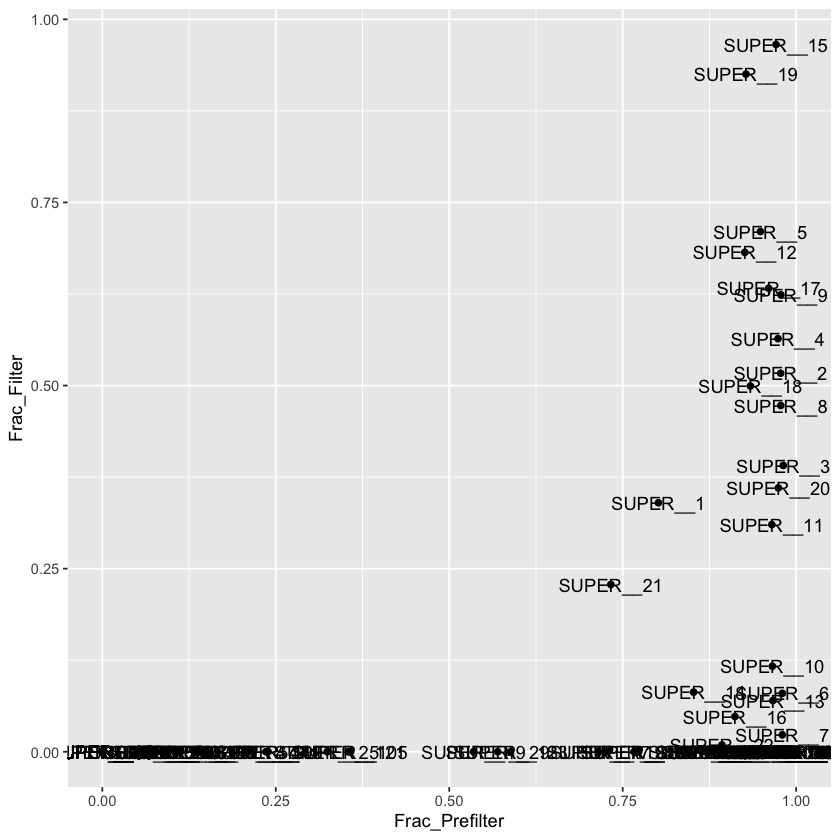

In [479]:
ggplot(hits, aes(x = Frac_Prefilter, y = Frac_Filter)) +
  geom_point() +
  geom_text(data = hits, aes(label = Chr))

In [14]:
hits[grep("SUPER__10$", hits$Spec1_Chr),] %>% arrange(Spec1_Start)

Spec1_Subj_ID,Spec1_Query_ID,Spec1_Chr,Spec1_Start,Spec1_End,Spec2_Subj_ID,Paf2_Mapq,Spec2_Query_ID,Paf1_Mapq
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
mMyoAui1.0.SUPER__10 30165329 39051904 323,mMyoAui1.0.SUPER__10 30165256 39294600 361,SUPER__10,30165329,39051904,mMyoCai1.0.SUPER__10 30229927 39367010 361,9,mMyoCai1.0.SUPER__10 30230000 39125000 323,9
mMyoAui1.0.SUPER__10 39086244 39343842 272,mMyoAui1.0.SUPER__10 30165256 39294600 361,SUPER__10,39086244,39294600,mMyoCai1.0.SUPER__10 30229927 39367010 361,9,mMyoCai1.0.SUPER__10 39165192 39420680 272,4
mMyoAui1.0.SUPER__10 39416703 39490798 258,mMyoAui1.0.SUPER__10 39470768 39618864 309,SUPER__10,39470768,39490798,mMyoCai1.0.SUPER__10 39573912 39755084 309,2,mMyoCai1.0.SUPER__10 39536280 39603736 258,2
mMyoAui1.0.SUPER__10 39610830 40498616 249,mMyoAui1.0.SUPER__10 39620000 40499616 307,SUPER__10,39620000,40498616,mMyoCai1.0.SUPER__10 39986409 40865779 307,7,mMyoCai1.0.SUPER__10 39975384 40864856 249,7


In [485]:
hit_prefilter_paf[grep("SUPER__10$", hit_prefilter_paf$seqnames),] %>% arrange(start)

seqnames,start,end,width,strand
<chr>,<int>,<int>,<int>,<fct>
mMyoAui1.0.SUPER__10,20008,3265126,3245119,*
mMyoAui1.0.SUPER__10,3370017,3464480,94464,*
mMyoAui1.0.SUPER__10,4075390,29726712,25651323,*
mMyoAui1.0.SUPER__10,29765477,30164150,398674,*
mMyoAui1.0.SUPER__10,30165256,39294600,9129345,*
mMyoAui1.0.SUPER__10,39311291,39334985,23695,*
mMyoAui1.0.SUPER__10,39340000,39464998,124999,*
mMyoAui1.0.SUPER__10,39470768,39618864,148097,*
mMyoAui1.0.SUPER__10,39620000,40499616,879617,*
